In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from wordcloud import WordCloud
from PIL import Image

In [23]:
data = pd.read_xml('uva_alma_beeldbank_dc_new.xml')

In [24]:
# explore data
data

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
0,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Architecture, peinture et sculpture de la mais...",Beschrijving gedrukte uitgave,A Amsterdam chez Gerard Valk,"Quellinus, Artus (Artus), beeldhouwer, 1609-16...",1719,None,https://hdl.handle.net/11245/3.3680,fre,"Architecture, peinture et sculpture de la mais...",None,None,None,None
1,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Max Havelaar, of de Koffij-veilingen der neder...",Beschrijving gedrukte uitgave,Brussel,"Lennep, J. van (Jacob), 1802-1868, publisher (...",1859,None,https://hdl.handle.net/11245/3.3641,dut,"Max Havelaar, of de Koffij-veilingen der neder...",None,None,None,None
2,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Rayz Beschraybung 1719-1724,Beschrijving gedrukte uitgave,Amsterdam,Zevi Hirsh ben Abraham transcriber,1752,None,https://hdl.handle.net/11245/3.3708,yid,Rayz Beschraybung 1719-1724,None,None,None,None
3,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Meleket ha-diqduq,Beschrijving gedrukte uitgave,Amsterdam,"ʾAbohav, Yiẕḥaq, 1605-1693 author (NL-LeOCL)...",1631,None,https://hdl.handle.net/11245/3.3709,heb,Meleket ha-diqduq,None,None,None,None
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Neederlandsche historien,Beschrijving gedrukte uitgave,Amsterdam Muiden,"Hooft, P.C. (Pieter Corneliszoon), 1581-1647 a...",1628,None,https://pid.uba.uva.nl/ark:/88238/b19900378229...,dut,Nederlandsche historien sedert de overdraght d...,Tachtigjarige oorlog,Nederland.http://data.bibliotheken.nl/id/thes/...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35559,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Lipsius, Justus, 1547-1606 schilderij: portret",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.94,xxx,"Lipsius, Justus, 1547-1606",None,None,geschilderd,None
35560,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Alexander VII, Paus, regerend 1655-1667 schild...",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.2533,xxx,"Alexander VII, Paus, regerend 1655-1667",None,None,geschilderd,None
35561,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Commelin, J. (Johannes) (1629-1692) schilderij...",Beschrijving gedrukte uitgave,None,None,1889,None,https://hdl.handle.net/11245/3.708,xxx,"Commelin, J. (Johannes) (1629-1692)",None,None,geschilderd,None
35562,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Walraven, D.A. (Didericus Adrianus) (1732-1804...",Beschrijving gedrukte uitgave,None,None,1770,None,https://hdl.handle.net/11245/3.2525,xxx,"Walraven, D.A. (Didericus Adrianus) (1732-1804)",None,None,geschilderd,None


In [25]:
data['contributor'].unique()

array(['Quellinus, Artus (Artus), beeldhouwer, 1609-1668. (NL-LeOCL)091438969 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839288655305131.jsonld',
       'Lennep, J. van (Jacob), 1802-1868, publisher (NL-LeOCL)06833544X https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839182012305131.jsonld',
       'Zevi Hirsh ben Abraham transcriber', ...,
       'Mascarenhas, Pero (NL-LeOCL)144244322 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839331252005131.jsonld',
       'Sampayo, Lopo Vaz de, 1526 fl. (NL-LeOCL)144243121 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839331253705131.jsonld',
       'Śaśporṭaś, Yaʿaqov (Jacob), 1610-1698. (NL-LeOCL)109311817 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839298098705131.jsonld'],
      dtype=object)

In [44]:
unique_dates = data['date'].unique()
unique_dates

array(['1719', '1859', '1752', '1631', '1628', '1669', '1670', '16uu',
       '1655', '1695', '166u', '1668', '1584', '1644', '1726', '1734',
       '1666', '1705', '1688', '1692', '1606', '1612', '1621', '1728',
       '1629', '1727', '1608', '1700', '1664', '1686', '1706', '1717',
       '1667', '1661', '1627', '1730', '1614', '1651', '1624', '1711',
       '1732', '1699', '1674', '1683', '1663', '1751', '1736', '1725',
       '1679', '1885', '1687', '1682', '1712', '1617', '1642', '1677',
       '1615', '1871', '1652', '1707', '1564', '1578', '1555', '1887',
       '1891', '1878', '1863', '1855', '1897', '1886', '1910', '1900',
       '1892', '1911', '1890', '1884', '1880', '1901', '1882', '1861',
       '1557', '1610', '1613', '1697', '1549', '1560', '1895', '1810',
       '1973', '1980', '1862', '1919', '1949', '1921', '1933', '1927',
       '1923', '1873', '1618', '1517', '1521', '1515', '1519', '1639',
       '1524', '1599', '1586', '1598', '1516', '1567', '1607', '1994',
      

In [27]:
data['language'].unique()

array(['fre', 'dut', 'yid', 'heb', 'lat', 'arm', 'arc', 'spa', 'ita',
       'ger', 'por', 'eng', 'goh', 'nds', 'und', 'grc', 'mul', 'ara',
       'fry', 'mis', 'swe', 'afr', 'may', 'san', 'chi', 'nor', 'rus',
       'dan', 'map', 'jav', 'sun', 'dum', 'epo', 'gre', 'ben', 'hun',
       'paa', 'fin', 'pol', 'ban', 'per', 'Nederlands [TA].', 'hin',
       'ind', 'egy', 'xxx', 'Text in Latin and Dutch.',
       'Hebreeuws in Latijns schrift.', 'Duits met Hebreeuwse letters.',
       'In het Duits met Hebreeuwse letters.', 'Duits met Hebreeuwse.',
       'Tekst in het Duits met Hebreeuwse letters.',
       'Taal onduidelijk, vermoedelijk Duits.',
       'Taal: misschien Hebreeuws in transcriptie.',
       'Taal onduidelijk, vermoedelijk Hebreeuws in transcriptie.'],
      dtype=object)

In [50]:
years = [str_ for str_ in unique_dates if str_ != None and len(str_) <= 4]

In [51]:
years

['1719',
 '1859',
 '1752',
 '1631',
 '1628',
 '1669',
 '1670',
 '16uu',
 '1655',
 '1695',
 '166u',
 '1668',
 '1584',
 '1644',
 '1726',
 '1734',
 '1666',
 '1705',
 '1688',
 '1692',
 '1606',
 '1612',
 '1621',
 '1728',
 '1629',
 '1727',
 '1608',
 '1700',
 '1664',
 '1686',
 '1706',
 '1717',
 '1667',
 '1661',
 '1627',
 '1730',
 '1614',
 '1651',
 '1624',
 '1711',
 '1732',
 '1699',
 '1674',
 '1683',
 '1663',
 '1751',
 '1736',
 '1725',
 '1679',
 '1885',
 '1687',
 '1682',
 '1712',
 '1617',
 '1642',
 '1677',
 '1615',
 '1871',
 '1652',
 '1707',
 '1564',
 '1578',
 '1555',
 '1887',
 '1891',
 '1878',
 '1863',
 '1855',
 '1897',
 '1886',
 '1910',
 '1900',
 '1892',
 '1911',
 '1890',
 '1884',
 '1880',
 '1901',
 '1882',
 '1861',
 '1557',
 '1610',
 '1613',
 '1697',
 '1549',
 '1560',
 '1895',
 '1810',
 '1973',
 '1980',
 '1862',
 '1919',
 '1949',
 '1921',
 '1933',
 '1927',
 '1923',
 '1873',
 '1618',
 '1517',
 '1521',
 '1515',
 '1519',
 '1639',
 '1524',
 '1599',
 '1586',
 '1598',
 '1516',
 '1567',
 '1607',
 

In [75]:
elems_per_year = [len(data[data['date'] == years[y]]) for y in range(len(years))]

low = [e for e in elems_per_year if e < 400]
mid = [e for e in elems_per_year if e > 400 and e < 800]
high = [e for e in elems_per_year if e > 800]


In [77]:
#stats
len(years), len(low), len(mid), len(high)

(521, 496, 13, 12)

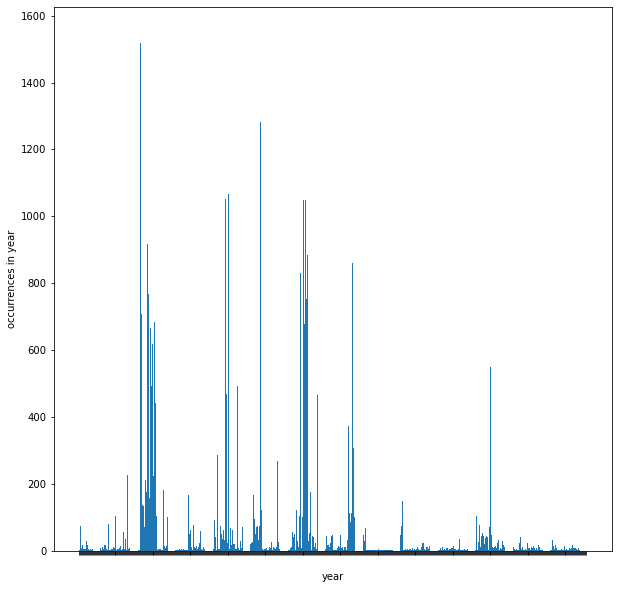

In [92]:
plt.figure(figsize=(10,10))
plt.bar(years, elems_per_year)
plt.xticks(color='w')
plt.xlabel('year')
plt.ylabel('occurrences in year')
plt.show()

In [90]:
joined = " ".join(data['title'].dropna().unique())

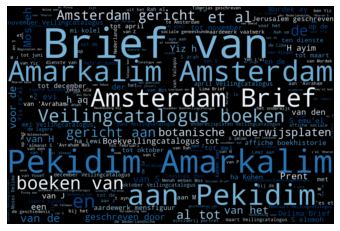

In [91]:
# code copied from: https://jingwen-z.github.io/data-viz-with-matplotlib-series9-word-cloud/

wordcloud = WordCloud(width=1280, height=853, margin=0,
                      colormap='Blues').generate(joined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [94]:
data['identifier']

0                      https://hdl.handle.net/11245/3.3680
1                      https://hdl.handle.net/11245/3.3641
2                      https://hdl.handle.net/11245/3.3708
3                      https://hdl.handle.net/11245/3.3709
4        https://pid.uba.uva.nl/ark:/88238/b19900378229...
                               ...                        
35559                    https://hdl.handle.net/11245/3.94
35560                  https://hdl.handle.net/11245/3.2533
35561                   https://hdl.handle.net/11245/3.708
35562                  https://hdl.handle.net/11245/3.2525
35563                   https://hdl.handle.net/11245/3.205
Name: identifier, Length: 35564, dtype: object